<a href="https://colab.research.google.com/github/Abhilaksh1498/SoC-20-Chatbot/blob/master/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
# To check the runtime type
import tensorflow as tf 
tf.test.gpu_device_name() 
# If GPU is connected it will display --- '/device:GPU:0'

# Uploading a file
from google.colab import files 
uploaded = files.upload() 

# to save it as a dataframe
# import io 
# df2 = pd.read_csv(io.BytesIO(uploaded['file_name.csv']))

# for more instructions use this link-  https://www.geeksforgeeks.org/how-to-use-google-colab/


Saving ai.yml to ai.yml
Saving botprofile.yml to botprofile.yml
Saving computers.yml to computers.yml
Saving emotion.yml to emotion.yml
Saving food.yml to food.yml
Saving gossip.yml to gossip.yml
Saving greetings.yml to greetings.yml
Saving health.yml to health.yml
Saving history.yml to history.yml
Saving humor.yml to humor.yml
Saving literature.yml to literature.yml
Saving money.yml to money.yml
Saving movies.yml to movies.yml
Saving politics.yml to politics.yml
Saving psychology.yml to psychology.yml
Saving science.yml to science.yml
Saving sports.yml to sports.yml
Saving trivia.yml to trivia.yml


In [0]:
import tensorflow as tf 
tf.test.gpu_device_name() 
# print(uploaded.items())
# Uploading cornell dataset
! wget http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip

--2020-05-31 13:37:33--  http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.20
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9916637 (9.5M) [application/zip]
Saving to: ‘cornell_movie_dialogs_corpus.zip’

cornell_movie_dialo 100%[===================>]   9.46M  6.47MB/s    in 1.5s    

2020-05-31 13:37:35 (6.47 MB/s) - ‘cornell_movie_dialogs_corpus.zip’ saved [9916637/9916637]



In [0]:
! unzip cornell_movie_dialogs_corpus.zip

Archive:  cornell_movie_dialogs_corpus.zip
   creating: cornell movie-dialogs corpus/
  inflating: cornell movie-dialogs corpus/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cornell movie-dialogs corpus/
  inflating: __MACOSX/cornell movie-dialogs corpus/._.DS_Store  
  inflating: cornell movie-dialogs corpus/chameleons.pdf  
  inflating: __MACOSX/cornell movie-dialogs corpus/._chameleons.pdf  
  inflating: cornell movie-dialogs corpus/movie_characters_metadata.txt  
  inflating: cornell movie-dialogs corpus/movie_conversations.txt  
  inflating: cornell movie-dialogs corpus/movie_lines.txt  
  inflating: cornell movie-dialogs corpus/movie_titles_metadata.txt  
  inflating: cornell movie-dialogs corpus/raw_script_urls.txt  
  inflating: cornell movie-dialogs corpus/README.txt  
  inflating: __MACOSX/cornell movie-dialogs corpus/._README.txt  


In [0]:
import os
import yaml
import re
import numpy as np
import pandas as pd
import keras
from keras import preprocessing, utils

Using TensorFlow backend.


In [0]:
lines = open(r'/content/cornell movie-dialogs corpus/movie_lines.txt', 'r', encoding= 'latin1').read()  # convert bytes into string
conversations = open(r'/content/cornell movie-dialogs corpus/movie_conversations.txt', 'r', encoding= 'latin1').read()
print(type(lines))   #string

<class 'str'>


In [0]:
lines = lines.split('\n')
conversations = conversations.split('\n')
id2line = {}
for line in lines:
    _line = line.split(' +++$+++ ')
    id2line[_line[0]] = _line[-1]

# there aren't any errors in movie_lines file as
# set([len(x.split(' +++$+++ ')) for x in lines]) = 5
    
# Creating a list of all of the conversations
conversations_ids = []
for conversation in conversations[:-1]:
    _conversation = conversation.split(' +++$+++ ')[-1][1:-1].replace("'", "")
    conversations_ids.append(_conversation.split(', '))

In [0]:
print(lines[1])
print(conversations[0]) 
print(id2line['L100007'])

L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']
I'm not asking for names or specifics.  I just want to know what prompted you to make the call?


In [0]:
questions = []
answers = []
for conversation in conversations_ids:
    for i in range(len(conversation) - 1):
        questions.append(id2line[conversation[i]])
        answers.append(id2line[conversation[i+1]])


*Add the kaggle chatterbot dataset later on as i cant create a huge sparse matrix*

In [0]:
errors = []
for x in uploaded.keys():
  string_val = uploaded[x].decode('utf-8','ignore')
  try:
    ques_ans = string_val.split('\n- - ')[1:]
    for i in ques_ans:
      i = i.split('\n - ')
      questions.append(i[0])
      answers.append(' '.join(i[1:]))
  except:
    errors.append(string_val)

In [0]:
# len(questions) = len(answers) = 222182

In [0]:
def clean_text(text):
       text = text.lower()
       text = re.sub(r"i'm", "i am", text)
       text = re.sub(r"he's", "he is", text)
       text = re.sub(r"she's", "she is", text)
       text = re.sub(r"that's", "that is", text)
       text = re.sub(r"what's", "what is", text)
       text = re.sub(r"where's", "where is", text)
       text = re.sub(r"how's", "how is", text)
       text = re.sub(r"\'ll", " will", text)
       text = re.sub(r"\'ve", " have", text)
       text = re.sub(r"\'re", " are", text)
       text = re.sub(r"\'d", " would", text)
       text = re.sub(r"won't", "will not", text)
       text = re.sub(r"can't", "cannot", text)
       text = re.sub(r"n't", " not", text)
       text = re.sub( '[^a-zA-Z]', ' ', text )
       return text

# while using tokenize punctutations are removed except ' 
# here i've tried to split most common words containing '
for i in range(len(questions)):
       questions[i] = clean_text(questions[i])
       answers[i] = clean_text(answers[i])

In [0]:
# We'll tokenize answers and questions

from keras.preprocessing.text import Tokenizer       
tokenizer = Tokenizer(oov_token= 'UNK', char_level= False)
tokenizer.fit_on_texts(questions + answers)

tokenizer.word_index['<SOS>'] = len(tokenizer.word_index)+1
tokenizer.word_index['<EOS>'] = len(tokenizer.word_index)+1

In [0]:
# We'll remove too long sentences (either question or answers) as it will take un-necessary
#memory while training
# using counter class we find most of questions/answers <= 30 words
req_ques = []
req_ans = []
for i in range(len(answers)):
       if (len(answers[i].split()) > 30 or len(questions[i].split())> 25):
              continue
       else:
              req_ans.append(answers[i])
              req_ques.append(questions[i])
answers = req_ans
questions = req_ques

In [0]:
# len(answers) = 214627 = len(questions)
# encoder input data
tokenized_questions = tokenizer.texts_to_sequences( questions )
maxlen_questions = max( [ len(x) for x in tokenized_questions ] )
padded_questions = preprocessing.sequence.pad_sequences( tokenized_questions , maxlen=maxlen_questions , padding='post' )
encoder_input_data = np.array( padded_questions )
print( encoder_input_data.shape , maxlen_questions )


(190616, 25) 25


In [0]:
# We need to add <SOS> token to decoder_input
# Append <EOS> to decoder_target
# since we are dealing in numbers we'll just add the required token in tokenized answers
# texts_to_sequences cleans text before splitting into words

# decoder_input_data
tokenized_answers = tokenizer.texts_to_sequences( answers )
decoder_input_data = [([tokenizer.word_index['<SOS>']] + tokenized_answers[i]) for i in range(len(tokenized_answers))]
maxlen_answers = max( [ len(x) for x in decoder_input_data] )
padded_answers = preprocessing.sequence.pad_sequences(decoder_input_data , maxlen=maxlen_answers , padding='post' )
decoder_input_data = np.array( padded_answers)

In [0]:
# print( decoder_input_data.shape , maxlen_answers )
# decoder_targets
decoder_output_data = [(tokenized_answers[i]+[tokenizer.word_index['<EOS>']]) for i in range(len(tokenized_answers))]
decoder_output_data = preprocessing.sequence.pad_sequences( decoder_output_data , maxlen=maxlen_answers , padding='post' )
decoder_output_data = np.array(decoder_output_data)

In [0]:
# Use glove vectors of 50d
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhilakshmaheshwari","key":"b4131928857e3bb171320644901f7a27"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir pre_trained_vec

In [0]:
! kaggle datasets download -d rtatman/glove-global-vectors-for-word-representation -p /content/pre_trained_vec


100% 457M/458M [00:04<00:00, 115MB/s]
100% 458M/458M [00:04<00:00, 110MB/s]


In [0]:
! unzip /content/pre_trained_vec/glove-vectors.zip -d /content/pre_trained_vec

Archive:  /content/pre_trained_vec/glove-vectors.zip
  inflating: /content/pre_trained_vec/glove.6B.100d.txt  
  inflating: /content/pre_trained_vec/glove.6B.200d.txt  
  inflating: /content/pre_trained_vec/glove.6B.50d.txt  


In [0]:
glove = open(r'/content/pre_trained_vec/glove.6B.50d.txt', 'r').read()
embedding_dict = {}
for line in glove.split('\n')[:-1]:
  line = line.split()
  embedding_dict[line[0]] = np.asarray(line[1:], dtype = 'float32')

In [0]:
# we'll create an embedding matirx which will be fed as an argument to Embedding layer
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1    # 0th index will be padding
embedding_dim = 50
embeddings_matrix = np.zeros((vocab_size, embedding_dim)); 
not_found_words = []
for word,index in word_index.items():
  vec = embedding_dict.get(word)         # if word is not present it returns None as value
  if vec is not None:
    embeddings_matrix[index] = vec       # words in corpus not found in glove (including oov_token) will be given 0 vector
  else:
    not_found_words.append(word)

### Building model


*   Bidirectional GRU for encoder
*   GRU for decoder
* Not using the faster cuDNNGRU as it doesn't support masking yet :(



In [0]:
LATENT_DIMENSION = 128
# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(maxlen_questions,))
encoder_embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen_questions, 
                                              weights=[embeddings_matrix], trainable=False,  mask_zero = True)(encoder_inputs)
encoder_rnn = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(LATENT_DIMENSION, return_state=True, recurrent_initializer='glorot_uniform'))
encoder_output, _,_= encoder_rnn(encoder_embedding)       # Note that size of encoder_output is (1, 2*LATENT_DIMENSION)
                                                          # The encoder_output will act as context vector
# Decoder
decoder_inputs = tf.keras.layers.Input(shape=(maxlen_answers,))
decoder_embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen_answers, 
                                              weights=[embeddings_matrix], trainable=False, mask_zero = True)(decoder_inputs)
decoder_rnn = tf.keras.layers.GRU(2*LATENT_DIMENSION, return_state= True, return_sequences=True)
decoder_rnn_output, _ = decoder_rnn(decoder_embedding)
decoder_dense = tf.keras.layers.Dense(vocab_size, activation = 'softmax') 
decoder_output = decoder_dense(decoder_rnn_output)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 31)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 31, 50)       2416450     input_3[0][0]                    
__________________________________________________________________________________________________
gru_1 (GRU)                     [(None, 31, 256), (N 236544      embedding_2[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 25)]         0                                            
______________________________________________________________________________________________

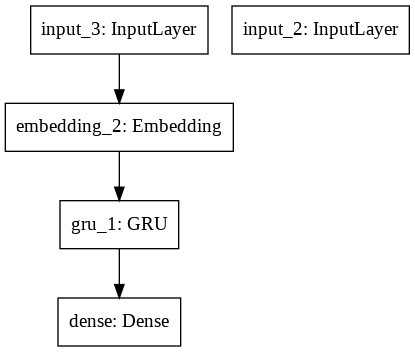

In [0]:
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_output )
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()
# Visualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [0]:
def generator(encoder_input_data, decoder_input_data, decoder_output_data, batch_size):
 # Create empty arrays to contain batch of features and labels#
 import random
 batch_encoder_input = np.zeros((batch_size,maxlen_questions))
 batch_decoder_input = np.zeros((batch_size,maxlen_answers))
 one_hot_targets = np.zeros((batch_size, maxlen_answers, vocab_size), dtype = 'float16')
 while True:
   for i in range(batch_size):
     # choose random index in features
     index= random.sample(list(range(len(encoder_input_data))),1)
     batch_encoder_input[i] = encoder_input_data[index]
     batch_decoder_input[i] = decoder_input_data[index]
     for counter,value in enumerate(decoder_output_data[index]):
       one_hot_targets[i,counter,value] = 1
   yield [batch_encoder_input,batch_decoder_input], one_hot_targets

In [0]:
model.fit_generator(generator(encoder_input_data, decoder_input_data, decoder_output_data, batch_size = 64),steps_per_epoch=len(encoder_input_data)//64, epochs=1)

2978/2978 [==============================] - 2400s 806ms/step - loss: 723.7266


In [0]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [0]:
def chat():
  # Cleaning input question to feed into encoder
  seed_question = input('Enter your question: ')
  seed_question = clean_text(seed_question)
  seed_question = seed_question.split()
  seed_question = tokenizer.texts_to_sequences([seed_question])
  seed_question = preprocessing.sequence.pad_sequences(seed_question, maxlen=maxlen_questions , padding='post', truncating= 'post' )
  seed_question = np.array(seed_question)

  # Making a sampling model
  sampling_input_encoder = tf.keras.layers.Input(shape=(maxlen_questions,))
  sampling_encoder_embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen_questions, 
                                              weights=[embeddings_matrix], trainable=False,  mask_zero = True)(sampling_input_encoder)
  context_vector, forward_h, backward_h = encoder_rnn(sampling_encoder_embedding)
  encoder_model = tf.keras.models.Model(inputs = sampling_input_encoder, outputs = context_vector )

  sampling_input_decoder = tf.keras.layers.Input(shape=(1,))
  sampling_state_h_input = tf.keras.layers.Input(shape=(2*LATENT_DIMENSION,))
  sampling_decoder_embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1, 
                                              weights=[embeddings_matrix], trainable=False,  mask_zero = True)(sampling_input_decoder)
  rnn_output, h = decoder_rnn(sampling_decoder_embedding, initial_state=[sampling_state_h_input])
  sampling_output = decoder_dense(rnn_output)
  decoder_model = tf.keras.models.Model(inputs = [sampling_input_decoder, sampling_state_h_input], outputs = [sampling_output,h] )
  encoder_model.summary()
  decoder_model.summary()
  generated_text =''
  target_seq = np.zeros((1, 1))
  target_seq[0][0] = word_index['<SOS>']   # SOS token
  initial_h = encoder_model.predict([seed_question])
  for _ in range(maxlen_answers):
    prob,initial_h = decoder_model.predict([target_seq, initial_h])
    next_word_index = np.argmax(prob)
    if (next_word_index == word_index['<EOS>'] or next_word_index == 0):
      break
    else:
      generated_text += ' '+rev_index_word[next_word_index]
      target_seq[0][0] = next_word_index
  return generated_text
      
    





In [0]:
rev_index_word = {i:u for i, u in enumerate(tokenizer.word_index.keys())}

In [0]:
chat()

Enter your question: What is a computer
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 25, 50)            2416450   
_________________________________________________________________
bidirectional (Bidirectional [(None, 256), (None, 128) 138240    
Total params: 2,554,690
Trainable params: 138,240
Non-trainable params: 2,416,450
_________________________________________________________________
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1)]          0                                            
___________________

' until hours understand the late mother ask seems understand seems understand seems understand seems understand seems understand seems understand seems understand seems understand seems understand seems understand seems understand seems understand'

In [0]:
# Downloading the model
!zip -r /content/trained_chatbot_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 89%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 59%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00002 (deflated 21%)
  adding: content/saved_model/my_model/variables/variables.data-00001-of-00002 (deflated 18%)
